# 3강 전처리 - daily mission

### mission - 기본적인 전처리를 실습해보고 적용해보자
- 강의에 소개된 전처리들을 Sklearn Toy data 및, retail data를 이용하여 적용해봅니다.

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import datetime as dt
import math
import glob
import os
import random
import re
import datatable as dt
import collections
import random

from scipy.interpolate import make_interp_spline, BSpline
from sklearn import preprocessing
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
from gensim.models import Word2Vec

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("pd version : " + pd.__version__)
print("np version : " + np.__version__)

pd version : 1.2.1
np version : 1.19.2


### set seed

In [ ]:
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
SEED = 42
seed_everything(SEED)

### load data

In [ ]:
root = './input/'
dataset_path = glob.glob(root + "*.csv")
print(dataset_path)

['./input\\label.txt', './input\\sample_submission.txt', './input\\train.txt']


In [ ]:
sample_submission = pd.read_csv(dataset_path[np.where(pd.Series(dataset_path).str.find("submission") != -1)[0][0]])
train = pd.read_csv(dataset_path[np.where(pd.Series(dataset_path).str.find("train") != -1)[0][0]])

# 1. numeric 

- scaling
- sklearn의 Toy data set을 이용하여 단순한 quantile transformation을 시행합니다.그리고 scaling 전, 후의 분포를 비교해 봅니다.

In [ ]:
df, target = datasets.load_boston(return_X_y=True)
Datasets = datasets.load_boston()

df = pd.DataFrame(df)
df.columns = Datasets['feature_names']
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


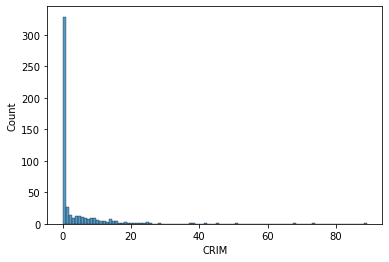

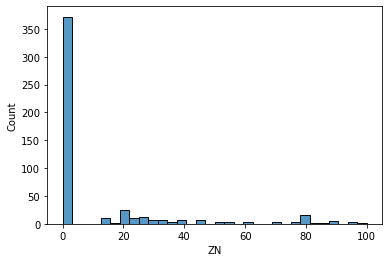

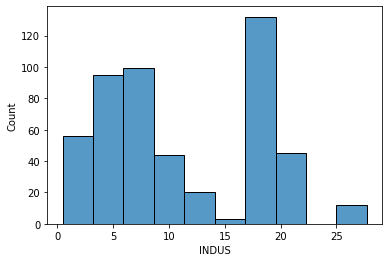

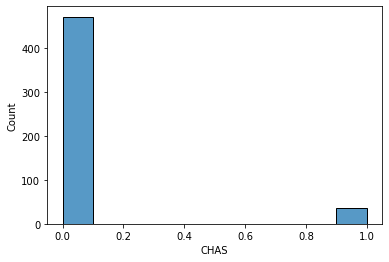

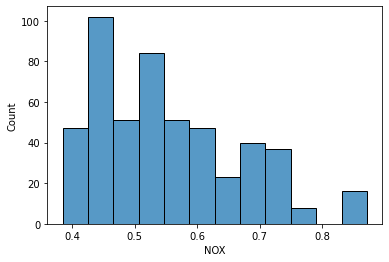

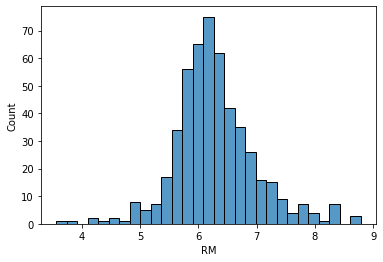

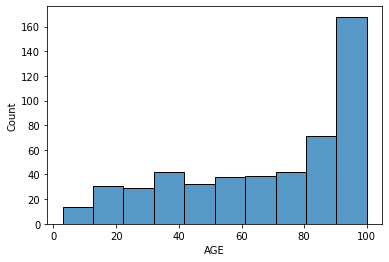

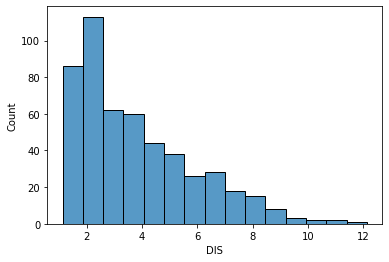

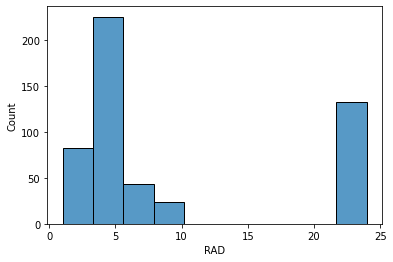

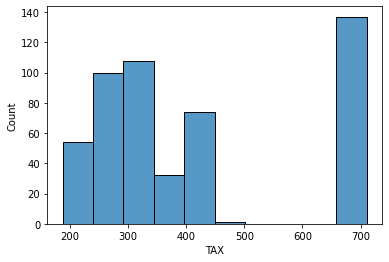

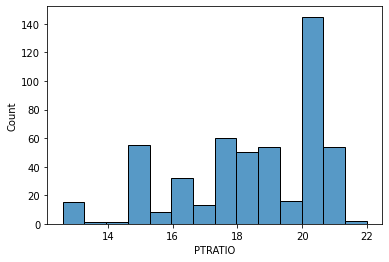

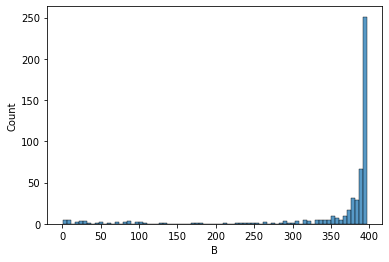

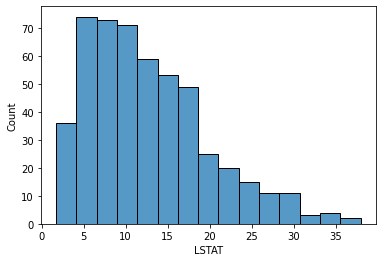

In [ ]:
for col in df.columns:    
    plt.figure()
    sns.histplot(df[col])    
    plt.show()

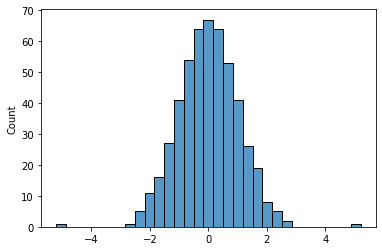

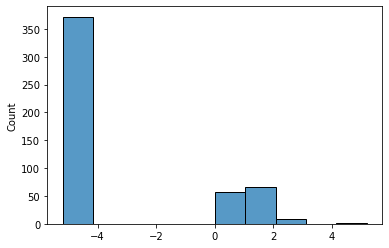

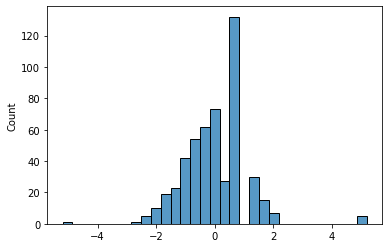

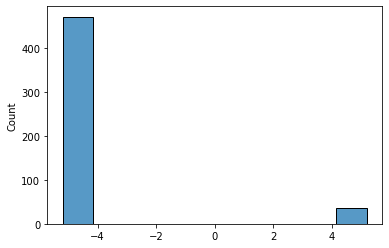

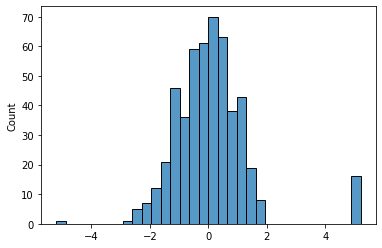

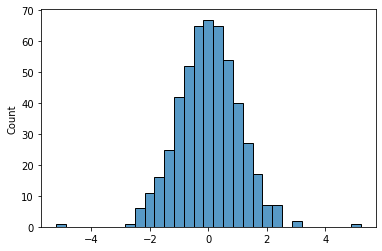

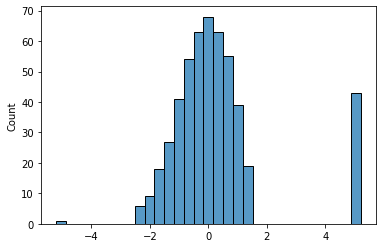

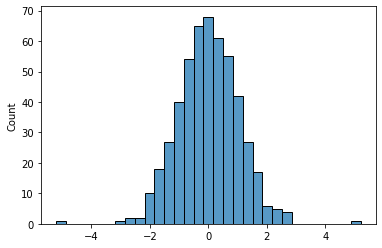

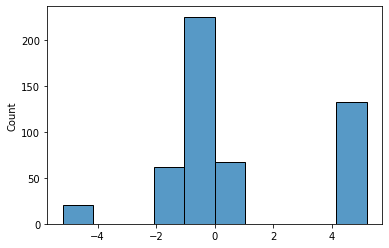

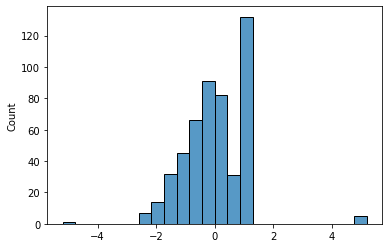

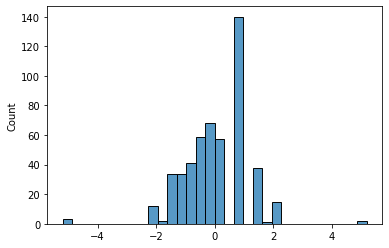

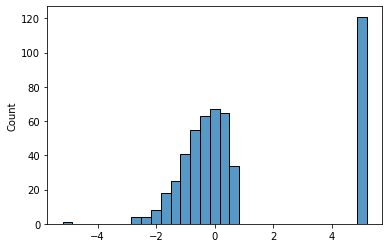

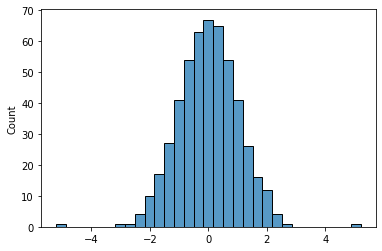

In [ ]:
df_scaled = df.copy()
for col in df.columns:
    
    temp = quantile_transform(np.array(df[col]).astype("float").reshape(-1,1), n_quantiles=100, random_state=0, copy=True, 
                         output_distribution = "normal").reshape(-1)    
    
    df_scaled[col] = temp
    sns.histplot(temp)    
    plt.show()

In [ ]:
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-5.199338,0.701628,-1.511407,-5.199338,0.037988,0.614807,-0.268910,0.354501,-5.199338,-0.472789,-1.066652,5.199338,-1.172113
1,-1.657193,-5.199338,-0.262197,-5.199338,-0.526581,0.369064,0.032500,0.620291,-1.549706,-1.221291,-0.472789,5.199338,-0.334339
2,-1.657587,-5.199338,-0.262197,-5.199338,-0.526581,1.332568,-0.330178,0.620291,-1.549706,-1.221291,-0.472789,0.141400,-1.514886
3,-1.511532,-5.199338,-1.639976,-5.199338,-0.611450,1.144528,-0.646650,0.965808,-1.168949,-1.639976,-0.063341,0.385122,-2.200635
4,-0.769753,-5.199338,-1.639976,-5.199338,-0.611450,1.274890,-0.462778,0.965808,-1.168949,-1.639976,-0.063341,5.199338,-1.065016


Quantile transformer에 대한 자세한 얘기는 아래 링크에서 많이 다루어 지고 있습니다. \
https://www.kaggle.com/c/lish-moa/discussion/193717 \
kaggle moa competition의 경우 quantile transformation을 많은 사람들이 취해주었고, \
해당 내용의 원리에 대해서 많은 토론이 이루어졌습니다. 


# 2. categorical 

- one hot encoding
- label encoding
- freq encoding
- target encoding

retail data를 이용하여 다양한 encoding방법을 알아보고, \
저희가 competition에서 사용하는 데이터와 유사한 데이터를 이용한 \
kaggle competition의 링크를 통해 공부하시고, 저희 데이터에 적용하셔도 될 것 같습니다.


In [ ]:
def Aggregation(input_df):
    data = input_df.copy()
    
    # group by 할 기준은 customer_id입니다.
    standard = ['customer_id']
    
    # total은 sum으로, quantity, price는 mean값을 사용합니다.
    sum_numeric = ['total']
    mean_numeric = ['quantity','price']
    
    # 현재 aggregation할 때 country만 사용하되, 고객의 구매기록의 마지막 거주지를 사용합니다.
    cat = ['country']
    
    data_agg_sum = data.groupby(standard).sum().reset_index()[standard + sum_numeric].sort_values('customer_id')
    data_agg_mean = data.groupby(standard).mean().reset_index()[standard + mean_numeric].sort_values('customer_id')
    data_agg_cat = data.drop_duplicates(standard, keep='last').reset_index()[standard + cat].sort_values('customer_id')
    
    data_agg = pd.merge(data_agg_sum, data_agg_mean, on=standard)
    data_agg = pd.merge(data_agg, data_agg_cat, on=standard)
    
    return data_agg

In [ ]:
train_temp = Aggregation(train)
train_temp.head()

,customer_id,total,quantity,price,country
0,12346,-85.3710,1.127660,19.922872,United Kingdom
1,12347,7749.5715,13.151659,4.230803,Iceland
2,12348,3332.0100,53.215686,6.247353,Finland
3,12349,7267.4910,8.994444,13.792075,Italy
4,12350,551.7600,11.588235,6.337941,Norway


- one hot encoding

In [ ]:
one_hot = pd.get_dummies(train_temp.country)
one_hot.head()

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- label encoding

In [ ]:
label_e = preprocessing.LabelEncoder()
label_e.fit(train_temp.country)
country_label = label_e.transform(train_temp.country)
train_temp['country_label'] = country_label

train_temp.head()

,customer_id,total,quantity,price,country,country_label
0,12346,-85.3710,1.127660,19.922872,United Kingdom,38
1,12347,7749.5715,13.151659,4.230803,Iceland,16
2,12348,3332.0100,53.215686,6.247353,Finland,12
3,12349,7267.4910,8.994444,13.792075,Italy,18
4,12350,551.7600,11.588235,6.337941,Norway,26


- freq encoding

In [ ]:
enco = (train_temp.groupby('country').size()) / len(train_temp)
enco.head()

country
Australia    0.002536
Austria      0.001860
Bahrain      0.000338
Belgium      0.004565
Brazil       0.000338
dtype: float64

In [ ]:
train_temp['country_freq_enco'] = train_temp['country'].apply(lambda x : enco[x])
train_temp.head()

- target mean encoding

In [ ]:
enco = train_temp.groupby('country').mean()['total']
enco.head()

country
Australia    18870.12050
Austria       3150.69000
Bahrain       1117.35525
Belgium       3690.60450
Brazil        1164.79275
Name: total, dtype: float64

In [ ]:
train_temp['country_target_mean_enco'] = train_temp['country'].apply(lambda x : enco[x])
train_temp.head()

,customer_id,total,quantity,price,country,country_label,country_freq_enco,country_target_mean_enco
0,12346,-85.3710,1.127660,19.922872,United Kingdom,38,0.911228,4037.204056
1,12347,7749.5715,13.151659,4.230803,Iceland,16,0.000169,7749.571500
2,12348,3332.0100,53.215686,6.247353,Finland,12,0.002367,3333.444321
3,12349,7267.4910,8.994444,13.792075,Italy,18,0.002875,2916.971912
4,12350,551.7600,11.588235,6.337941,Norway,26,0.002198,4146.603577


- entity embedding 

이 경우는 사실상, 딥러닝 방법을 이용한 embedding이라고 할 수 있습니다. \
일반적인 범주형의 자료의 경우 이렇게 embedding을 해줄 순 없지만 \
자연어의 경우 종종 word2vec을 이용하여 feature engineering을 하곤 합니다.




In [ ]:
def word2vec_feature(prefix, data_input, groupby, target,size):
    df = data_input.copy()
    
    df_bag = pd.DataFrame(df[[groupby, target]])
    df_bag[target] = df_bag[target].astype(str)
    df_bag[target].fillna('NAN', inplace=True)
    df_bag = df_bag.groupby(groupby, as_index=False)[target].agg({'list':(lambda x: list(x))}).reset_index()
    doc_list = list(df_bag['list'].values)
    w2v = Word2Vec(doc_list, size=size, window=3, min_count=1, workers=32)
    vocab_keys = list(w2v.wv.vocab.keys())
    w2v_array = []
    for v in vocab_keys :
        w2v_array.append(list(w2v.wv[v]))
    df_w2v = pd.DataFrame()
    df_w2v['vocab_keys'] = vocab_keys    
    df_w2v = pd.concat([df_w2v, pd.DataFrame(w2v_array)], axis=1)
    df_w2v.columns = [target] + ['w2v_%s_%s_%d'%(prefix,target,x) for x in range(size)]
    print ('df_w2v:' + str(df_w2v.shape))
    return df_w2v

In [ ]:
word2vec_fe = word2vec_feature("description", train, "customer_id", "description",100)

df_w2v:(5297, 101)


In [ ]:
word2vec_fe

,description,w2v_description_description_0,w2v_description_description_1,w2v_description_description_2,w2v_description_description_3,w2v_description_description_4,w2v_description_description_5,w2v_description_description_6,w2v_description_description_7,w2v_description_description_8,...,w2v_description_description_90,w2v_description_description_91,w2v_description_description_92,w2v_description_description_93,w2v_description_description_94,w2v_description_description_95,w2v_description_description_96,w2v_description_description_97,w2v_description_description_98,w2v_description_description_99
0,This is a test product.,-0.079012,-0.153927,-0.164358,0.054620,0.079462,-0.044636,0.198637,-0.149399,0.202924,...,0.102139,-0.075586,-0.039325,-0.167144,-0.177978,0.055736,0.035022,-0.042003,0.098856,0.024493
1,Adjustment by john on 26/01/2010 17,-0.069072,-0.143418,-0.200231,0.034310,0.055376,0.077514,0.137716,-0.134774,0.191424,...,0.188690,-0.101148,-0.077168,0.009008,-0.189574,-0.020753,0.009838,-0.012251,0.199489,0.048534
2,RED SPOTTY CHILDS UMBRELLA,0.147139,0.485030,-1.142879,0.651336,-0.509549,1.178234,0.109885,-0.393227,0.925784,...,0.435253,-0.059131,-0.408315,-0.640852,-1.293867,-1.305476,0.242099,0.557116,0.213262,-0.125653
3,EDWARDIAN PARASOL RED,0.027657,0.560768,-0.882068,-0.395421,0.593578,0.775380,1.144088,-0.982469,0.309377,...,-0.103258,-0.007982,-0.506846,-0.866705,-1.509634,-0.911753,0.443423,0.884790,-0.296102,-0.886319
4,EDWARDIAN PARASOL NATURAL,-0.156991,0.530462,-0.372302,-0.365466,1.064570,0.639933,1.043651,-0.788582,0.195543,...,-0.032186,0.125515,-0.541181,-0.723000,-1.980142,-1.285715,0.233360,0.969242,0.014823,-1.507700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,ENGLISH ROSE EDWARDIAN PARASOL,-0.012392,-0.009433,-0.017658,-0.002199,0.016233,0.006777,0.025238,-0.025903,0.011186,...,0.007109,-0.008582,-0.011811,-0.004331,-0.026809,-0.013336,0.004026,-0.002636,0.019395,-0.005454
5293,DOOR MAT CAMOUFLAGE,0.007110,-0.007193,-0.010327,-0.000704,0.006102,0.011456,0.019388,-0.009445,0.005865,...,0.007912,-0.010563,-0.000233,-0.000110,-0.010407,-0.006919,-0.003059,0.000629,0.013914,-0.006204
5294,"MIRROR, ARCHED GEORGIAN",-0.012356,-0.024604,-0.009711,-0.006389,0.016269,0.010287,0.003559,-0.013624,0.009150,...,-0.000590,-0.004299,0.002033,0.010699,-0.007850,-0.005326,-0.009993,-0.003324,0.013772,0.008647
5295,CAT WITH SUNGLASSES BLANK CARD,-0.008595,0.018476,-0.028525,-0.000240,-0.005163,-0.005377,0.015024,-0.018120,0.008195,...,-0.002281,-0.000379,-0.001369,-0.016192,-0.005100,-0.016106,0.005040,-0.019714,-0.006440,-0.002746


In [ ]:
train_word = pd.merge(train, word2vec_fe, on='description', how='left')

In [ ]:
train_word.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,w2v_description_description_0,...,w2v_description_description_90,w2v_description_description_91,w2v_description_description_92,w2v_description_description_93,w2v_description_description_94,w2v_description_description_95,w2v_description_description_96,w2v_description_description_97,w2v_description_description_98,w2v_description_description_99
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61,0.333221,...,-0.436650,-0.168822,0.216172,0.679230,0.457442,0.180423,-0.151523,-0.949666,0.588544,0.485132
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,0.082676,...,1.257117,-0.515209,-0.452327,0.510732,-0.599533,-0.864924,-0.007566,1.016624,0.903962,-0.367131
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,0.307686,...,0.969259,-0.439085,-0.201471,0.362776,-0.467901,-0.808777,-0.189431,0.798987,0.761491,-0.126750
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32,0.152825,...,0.443547,-0.484335,-0.013774,-0.223255,-0.159346,-0.896956,-0.487527,-0.092392,-0.135926,0.700965
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50,-0.309757,...,0.614234,0.263023,-0.874449,-0.760344,-1.798656,1.214319,0.145522,-1.232567,1.019163,0.138278


저희가 사용하는 Data와 유사한 Data를 이용하여 competition을 진행한 kaggle competiton입니다. \
대회명은 elo merchant입니다.

https://www.kaggle.com/c/elo-merchant-category-recommendation/discussion/82055

# 2. Missing values

In [ ]:
def generate_missing(Data_input, ratio=0.1):
    df_temp = Data_input.copy()
    
    df_temp = df.copy()

    replaced = collections.defaultdict(set)
    ix = [(row, col) for row in range(df_temp.shape[0]) for col in range(df_temp.shape[1])]
    random.shuffle(ix)
    to_replace = int(round(ratio*len(ix)))
    for row, col in ix:
        if len(replaced[row]) < df_temp.shape[1] - 1:
            df_temp.iloc[row, col] = np.nan
            to_replace -= 1
            replaced[row].add(col)
            if to_replace == 0:
                break
                
    return df_temp

In [ ]:
df_temp = generate_missing(df, ratio=0.1)
df_temp.isnull().sum() / len(df_temp)

CRIM       0.110672
ZN         0.098814
INDUS      0.100791
CHAS       0.110672
NOX        0.092885
RM         0.126482
AGE        0.083004
DIS        0.116601
RAD        0.126482
TAX        0.086957
PTRATIO    0.077075
B          0.090909
LSTAT      0.079051
dtype: float64

- regression

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=42)
imp.fit(df_temp)
df_temp_imputed = pd.DataFrame(imp.transform(df_temp))
df_temp_imputed.columns = df_temp.columns

In [ ]:
df_temp_imputed.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.477051,6.575000,65.200000,4.0900,1.000000,212.85173,17.299452,396.90,9.047610
1,0.02731,0.0,7.07,0.0,0.469000,6.421000,78.900000,4.9671,2.000000,242.00000,17.800000,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.484805,6.277456,57.160297,4.9671,2.000000,242.00000,18.179833,392.83,10.405006
3,0.03237,0.0,2.18,0.0,0.458000,6.998000,45.800000,6.0622,3.000000,222.00000,18.700000,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458000,7.147000,54.200000,6.0622,2.973865,222.00000,18.700000,396.90,5.330000


- KNN Nearest

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_temp_imputed = pd.DataFrame(imputer.fit_transform(df_temp))
df_temp_imputed.columns = df_temp.columns

In [ ]:
df_temp_imputed.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.4846,6.575,65.20,4.0900,1.0,285.8,16.78,396.90,9.856
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.90,4.9671,2.0,242.0,17.80,396.90,9.140
2,0.02729,0.0,7.07,0.0,0.5496,6.500,75.54,4.9671,2.0,242.0,19.40,392.83,9.088
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.80,6.0622,3.0,222.0,18.70,394.63,2.940
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.20,6.0622,4.6,222.0,18.70,396.90,5.330


missing value의 경우 합리적으로 삽입하는 경우가 제일 좋지만, 그렇지 못한 경우에 위와 같이 삽입을 해줄 수 있습니다. \
하지만, 보통의 경우 데이터를 보고 변수간의 관계나 혹은 인문학적인 소양을 통해 삽입해줄 수 있는 경우도 많습니다. \
https://www.kaggle.com/grazder/filling-card-nans 해당 링크가 그러한 예시이며, IEEE라는 kaggle에서 아주 유명한 competiton입니다. 
    


# 3. Outlier


outlier의 경우는 처리하기가 상당히 까다롭습니다. \
성능적인 측면에서 본다면 train에서 outlier로 판별되었더라도 \
그러한 분포를 지닌 data가 test에도 있다면 결국 그것을 이용하여 예측을 해야합니다. 

또한, 제거했을 때 더 좋을 수도 있고, 함께 학습을 시켰을 때 더 좋을 수도 있습니다. \
단순히 ZRscore를 통해 outlier를 계산하는 예시지만, 

https://www.kaggle.com/waitingli/combining-your-model-with-a-model-without-outlier
위의 kaggle competiton의 경우 outlier를 디텍션한 이후에 \
outlier를 제거한 모델과, 모두 함께 학습시킨 모델을 combining하는 등 다양한 실험을 하게 됩니다. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.33, random_state=42)

In [ ]:
import scipy.stats as stats

out=[]
def ZRscore_outlier(Data_input):
    df = Data_input.copy()
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df.index:
        value = df[i]
        z = (0.6745*(value-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    
    return out

In [ ]:
out_last = []

for col in X_train.columns:
    out = []
    out.extend(ZRscore_outlier(X_train[col]))

In [ ]:
out

[374, 161, 374, 161]

# 4. Dimension reduction

- tsne

차원축소의 경우는 사실상 EDA과정이라고 할 수 있습니다. \
물론, 다음 https://www.kaggle.com/c/lish-moa/code?competitionId=19988&searchQuery=PCA 과 같이 PCA 등 차원축소를 이용하여 \
기존의 feature가 잡아내지 못하는 부분을 잡아내기 위해 feature로 추가 하기도 합니다.

또는 이미지 데이터를 EDA하기 위해, gpu 연산을 이용한 tsne를 사용하여 \
https://www.kaggle.com/c/siim-isic-melanoma-classification/discussion/168028
위와 같이 EDA를 하기도 합니다.

저희 데이터의 경우 차원을 축소할 만큼, 데이터가 크지 않기 때문에 \
Toy Dataset을 이용하여 train, test의 분포가 유사한지 확인해보는 용도, \
혹은 outlier를 확인해보는 용도로 사용해보도록 하겠습니다.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2, random_state=21)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=48)
tsne_results = tsne.fit_transform(df_scaled)
tdf = pd.DataFrame(tsne_results)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 506 samples in 0.002s...
[t-SNE] Computed neighbors for 506 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 506 / 506
[t-SNE] Mean sigma: 1.763142
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.373379
[t-SNE] KL divergence after 300 iterations: 0.248336


<AxesSubplot:xlabel='0', ylabel='1'>

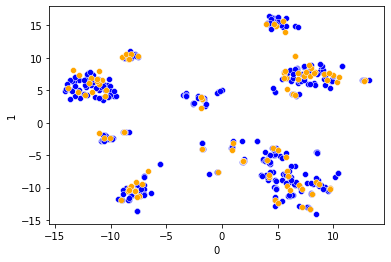

In [ ]:
sns.scatterplot(tdf.iloc[X_train.index][0],  tdf.iloc[X_train.index][1],   color='blue')
sns.scatterplot(tdf.iloc[X_test.index][0], tdf.iloc[X_test.index][1], color='orange')